In [ ]:
## Costumer Churn Detection Project

In [ ]:
!pip install wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=478b28c70a73ac6ace875575ba4f4306505b33a2f0a77baa0c4e2a9dac7240c6
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [ ]:
!pip install mlxtend

In [ ]:
!pip install xgboost --upgrade

In [ ]:
!pip install -U imbalanced-learn

In [ ]:
!pip install hyperopt

In [ ]:
## Import libraries
import os
import random
import joblib
import wget
import warnings
warnings.simplefilter(action ="ignore")

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import pandas as pd
from scipy.stats.mstats import skew, kurtosis

from sklearn.preprocessing import StandardScaler, MinMaxScaler,Normalizer
from sklearn.preprocessing import LabelEncoder, LabelBinarizer
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.feature_selection import SelectKBest, f_classif, RFECV
#import sys
#sys.modules['sklearn.externals.joblib'] = joblib
#from mlxtend.feature_selection import ExhaustiveFeatureSelector
#from sklearndf.transformation import KBinsDiscretizerDF

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb

random.seed(42)
np.random.seed(42)

In [ ]:
# Get data
url = 'https://public.dhe.ibm.com/software/data/sw-library/cognos/mobile/C11/data/Telco_customer_churn.xlsx'
wget.download(url, '/tmp')

'/tmp/Telco_customer_churn.xlsx'

In [ ]:
filepath = "/tmp/Telco_customer_churn.xlsx"
df = pd.read_excel(filepath)

In [ ]:
## Exploratory data analysis 
# Data structure

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [ ]:
## Shape and structured od numerical data
print(f"Data Shape:{df.shape}")
# set the max columns to none
pd.set_option('display.max_columns', None)
df.head(10)

Data Shape:(7043, 33)


,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices
5,4190-MFLUW,1,United States,California,Los Angeles,90020,"34.066367, -118.309868",34.066367,-118.309868,Female,No,Yes,No,10,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Credit card (automatic),55.20,528.35,Yes,1,78,5925,Competitor offered higher download speeds
6,8779-QRDMV,1,United States,California,Los Angeles,90022,"34.02381, -118.156582",34.023810,-118.156582,Male,Yes,No,No,1,No,No phone service,DSL,No,No,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes,1,100,5433,Competitor offered more data
7,1066-JKSGK,1,United States,California,Los Angeles,90024,"34.066303, -118.435479",34.066303,-118.435479,Male,No,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,Yes,1,92,4832,Competitor made better offer
8,6467-CHFZW,1,United States,California,Los Angeles,90028,"34.099869, -118.326843",34.099869,-118.326843,Male,No,Yes,Yes,47,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.35,4749.15,Yes,1,77,5789,Competitor had better devices
9,8665-UTDHZ,1,United States,California,Los Angeles,90029,"34.089953, -118.294824",34.089953,-118.294824,Male,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,No,Electronic check,30.20,30.2,Yes,1,97,2915,Competitor had better devices


In [ ]:
df['Contract'].unique()

array(['Month-to-month', 'Two year', 'One year'], dtype=object)

In [ ]:
## Struture of no-numerical data
df.describe(include = "object").T

,count,unique,top,freq
CustomerID,7043,7043,3668-QPYBK,1
Country,7043,1,United States,7043
State,7043,1,California,7043
City,7043,1129,Los Angeles,305
Lat Long,7043,1652,"33.964131, -118.272783",5
Gender,7043,2,Male,3555
Senior Citizen,7043,2,No,5901
Partner,7043,2,No,3641
Dependents,7043,2,No,5416
Phone Service,7043,2,Yes,6361


In [ ]:
##### Structure of numerical data 

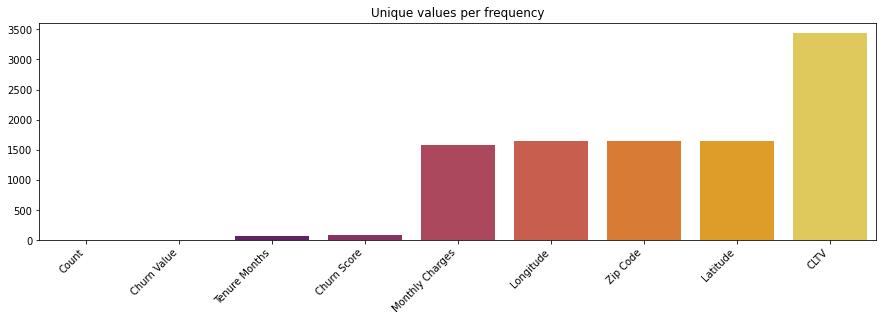

In [ ]:
uniq_values = df.select_dtypes('number').nunique().sort_values()

fig, ax = plt.subplots(figsize =(15,4))
sns.barplot(x = uniq_values.index, y = uniq_values, palette = 'inferno', ax = ax)
#ax.set_yscale("log")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set_title('Unique values per frequency');

In [ ]:
## Conclution

#### Data Quality

In [ ]:
##### Duplicate
n_duplicated = df.drop(columns = 'CustomerID').duplicated().sum()

print(f"There are {n_duplicated} duplicate values in dataset")

There are 0 duplicate values in dataset


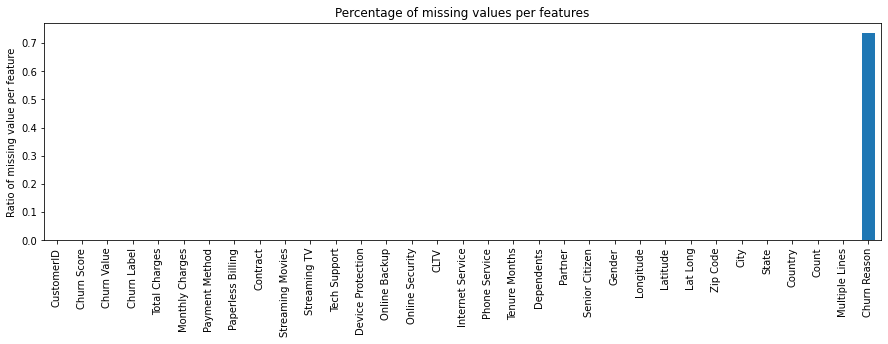

In [ ]:
## Missing values
(
    df
    .isnull()
    .mean()
    .sort_values()
    .plot(
        kind = "bar",
        figsize = (15,4),
        ylabel = "Ratio of missing value per feature",
        title = "Percentage of missing values per features"
    )

);

In [ ]:
## Wrangle funtion
def wrangle(df):

  ## Unnecesarie data and leakage variables 
  drop_column = ['CustomerID','Count','Country','City','State','Churn Label', 'Zip Code', 'Churn Score', 'Lat Long', 'Total Charges']
  df.drop(columns = drop_column, inplace = True)

  ## Drop column with more than 50% of missing values 
  df.dropna(thresh = df.shape[0] * 0.5, axis= 1, inplace = True)

  return df

In [ ]:
df = wrangle(df)
print(f"Shape: {df.shape}")

Shape: (7043, 22)


In [ ]:
# Unwanted entries and recording errors

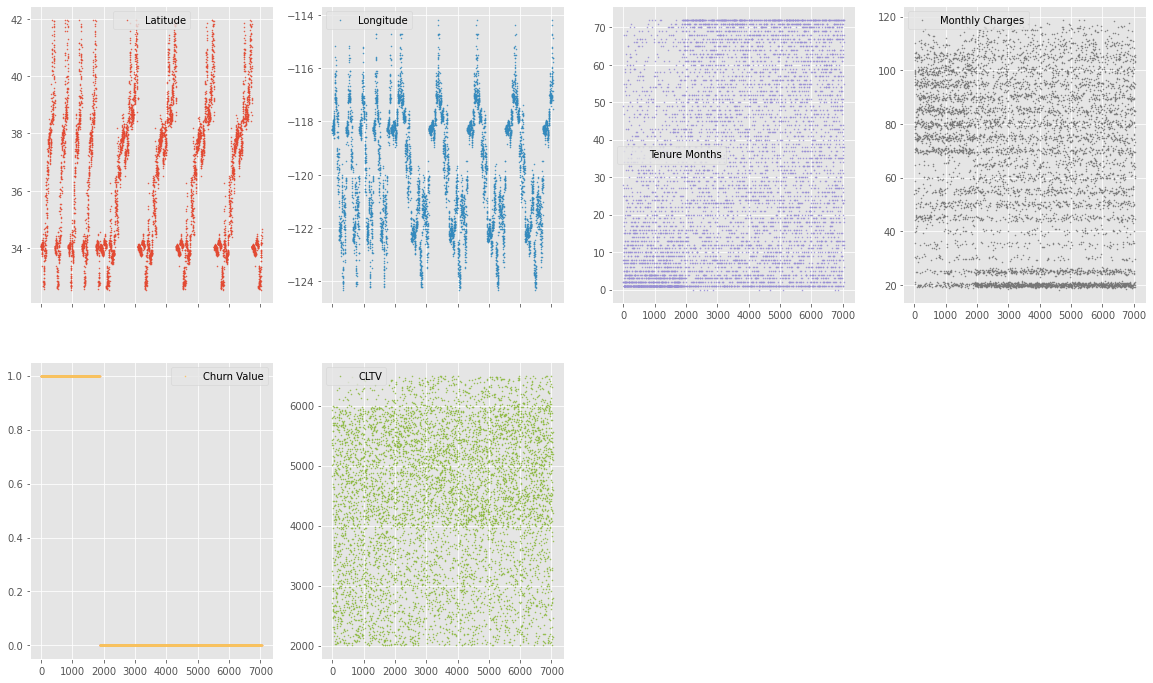

In [ ]:
## Numerical Features plot
df.plot(lw = 0, marker = ".", 
        subplots = True, 
        layout= (-1, 4),
        figsize = (20, 12),
        markersize = 1,
       );

In [ ]:
# Summary Statistic and distribution 

In [ ]:
## Summary statistic 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Latitude,7043.0,36.282441,2.455723,32.555828,34.030915,36.391777,38.224869,41.962127
Longitude,7043.0,-119.798880,2.157889,-124.301372,-121.815412,-119.730885,-118.043237,-114.192901
Tenure Months,7043.0,32.371149,24.559481,0.000000,9.000000,29.000000,55.000000,72.000000
Monthly Charges,7043.0,64.761692,30.090047,18.250000,35.500000,70.350000,89.850000,118.750000
Churn Value,7043.0,0.265370,0.441561,0.000000,0.000000,0.000000,1.000000,1.000000
CLTV,7043.0,4400.295755,1183.057152,2003.000000,3469.000000,4527.000000,5380.500000,6500.000000


In [ ]:
# Features Distributions 

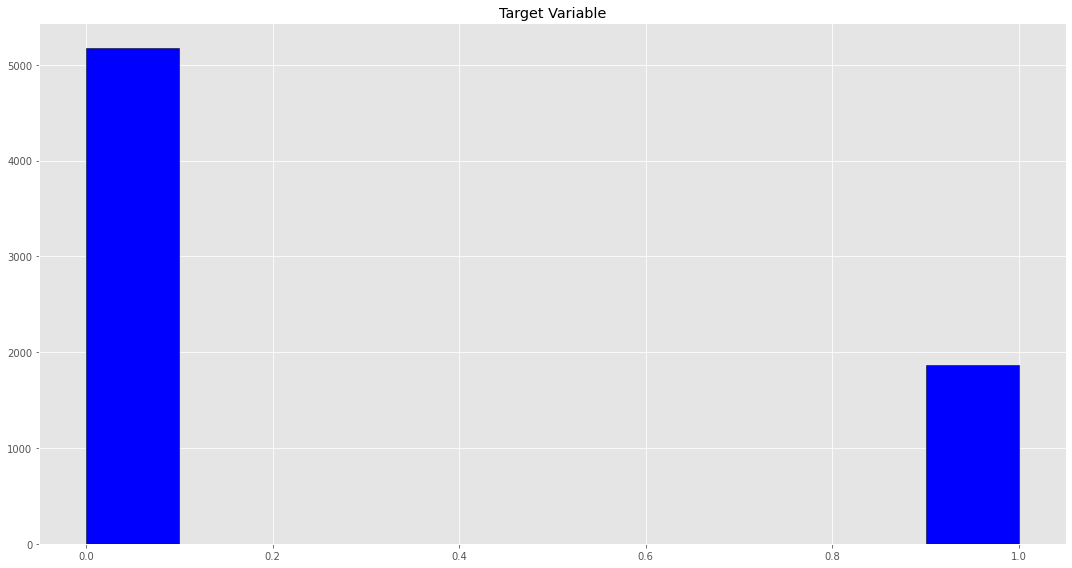

In [ ]:
df['Churn Value'].hist(figsize = (15, 8),
                       color = "blue",
                       edgecolor = "black")
plt.title("Target Variable")
plt.tight_layout();

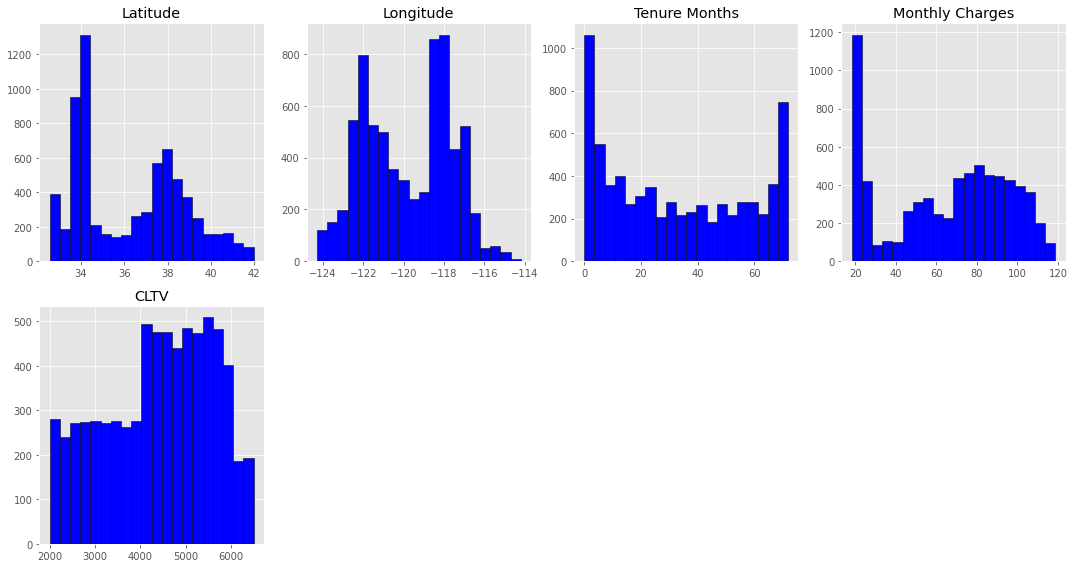

In [ ]:
df.drop(columns = 'Churn Value').hist(bins = 20,
                                      figsize = (15, 8),
                                      layout = (-1, 4),
                                      color = "blue",
                                      edgecolor = "black",
                                      )
plt.tight_layout();

In [ ]:
# Kurtosis and skew
num_features = [num for num in df.select_dtypes("number").columns if num != "Churn Value"]

for c in num_features:
    kurt = kurtosis(df[c])
    Skew = skew(df[c])
    
    print(f"{c} Skew: {np.round(Skew, 2)}, Kurtosis: {np.round(kurt, 2)}")

Latitude Skew: 0.3, Kurtosis: -1.14
Longitude Skew: -0.04, Kurtosis: -1.14
Tenure Months Skew: 0.24, Kurtosis: -1.39
Monthly Charges Skew: -0.22, Kurtosis: -1.26
CLTV Skew: -0.31, Kurtosis: -0.93


In [ ]:
## Feature Patters 

In [ ]:
## Continuos variables
cols_continuous = df.select_dtypes(include="number").nunique() >= 25
df_continuous = df[cols_continuous[cols_continuous].index]
df_continuous.shape

(7043, 5)

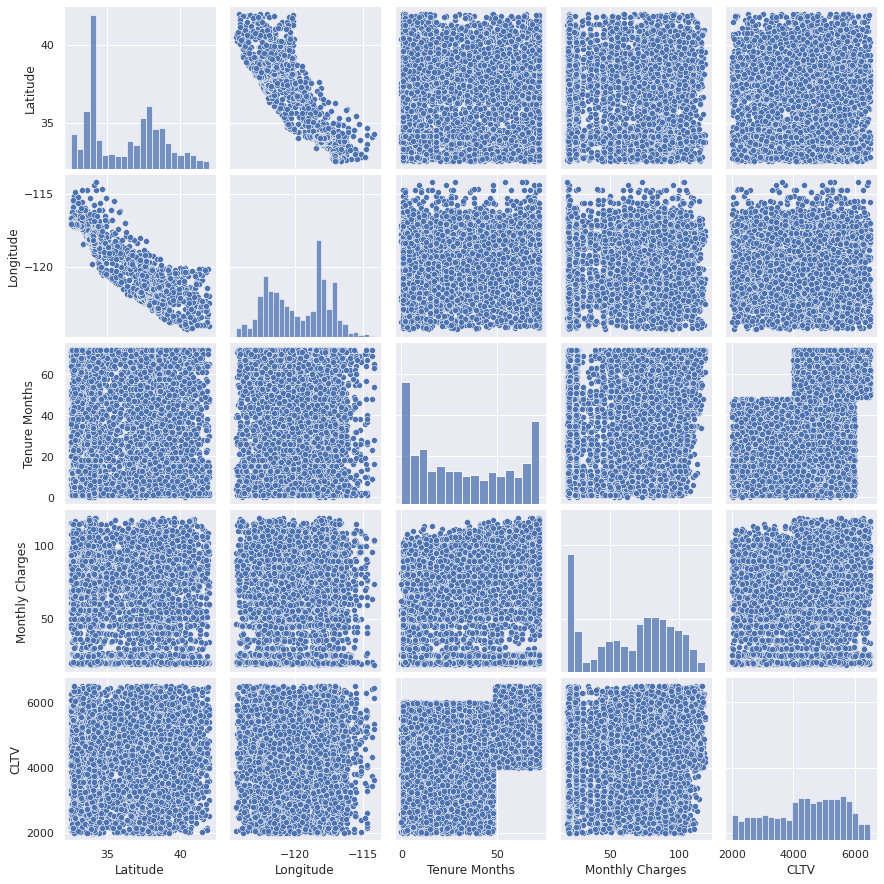

In [ ]:
## pairplot
sns.set(rc={'figure.figsize':(15,10)})
sns.pairplot(df_continuous)
sns.set_context('talk')
sns.set_style('white')

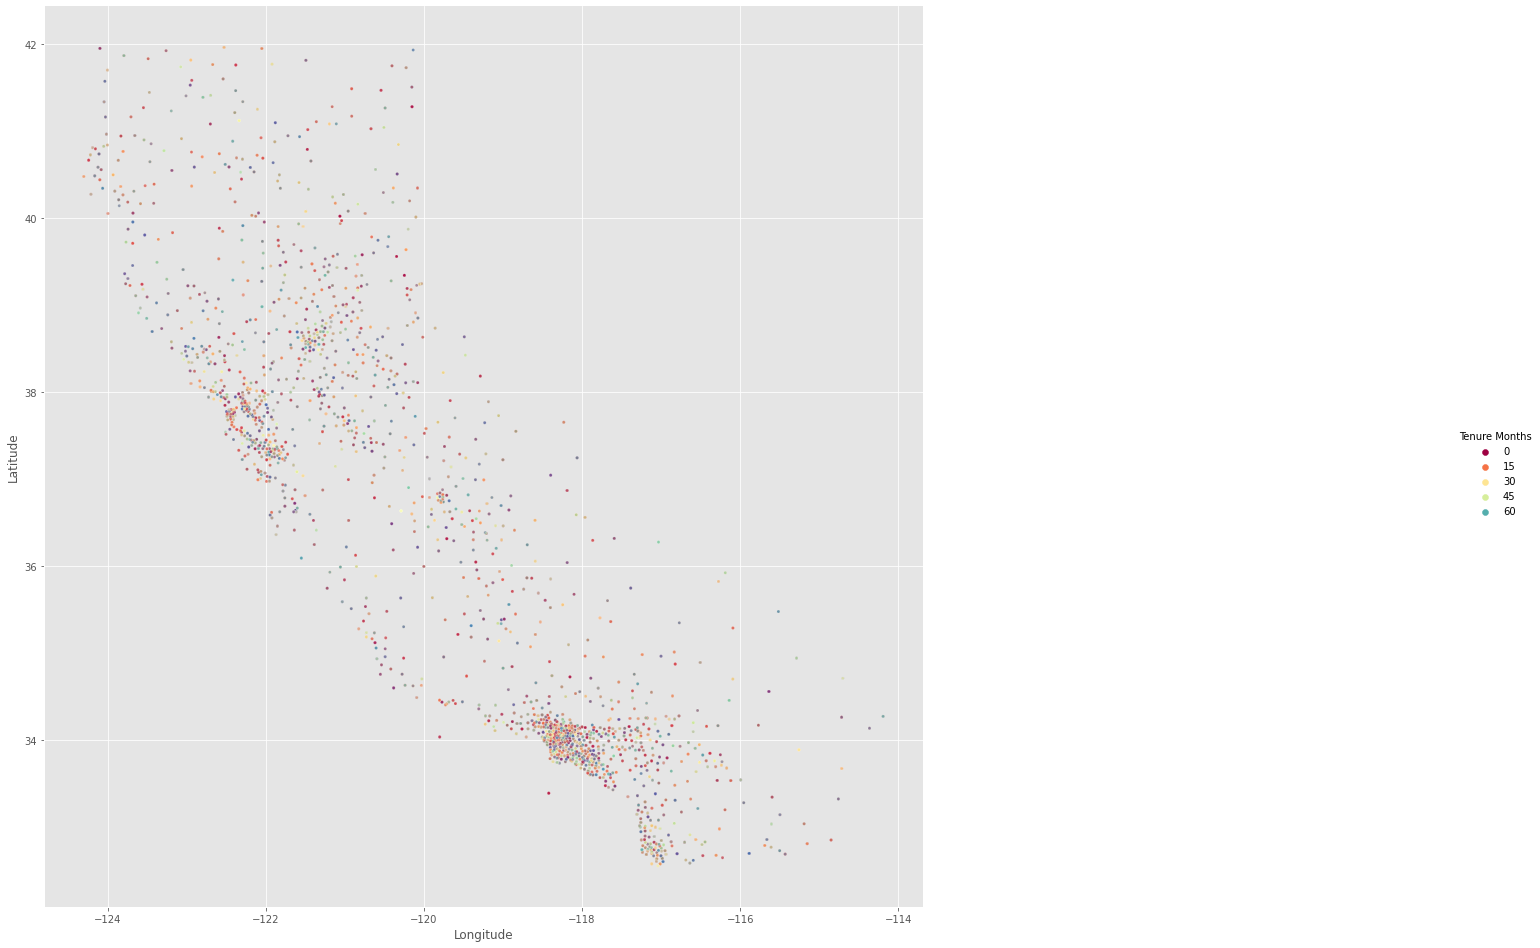

In [ ]:
## Exploring gegraphical data
ax = sns.pairplot(df,plot_kws={'s': 9, 'alpha': 0.5},
             hue ='Tenure Months', palette = 'Spectral',
             x_vars= ['Longitude'], y_vars= ['Latitude'])
ax.fig.set_size_inches(25, 17)

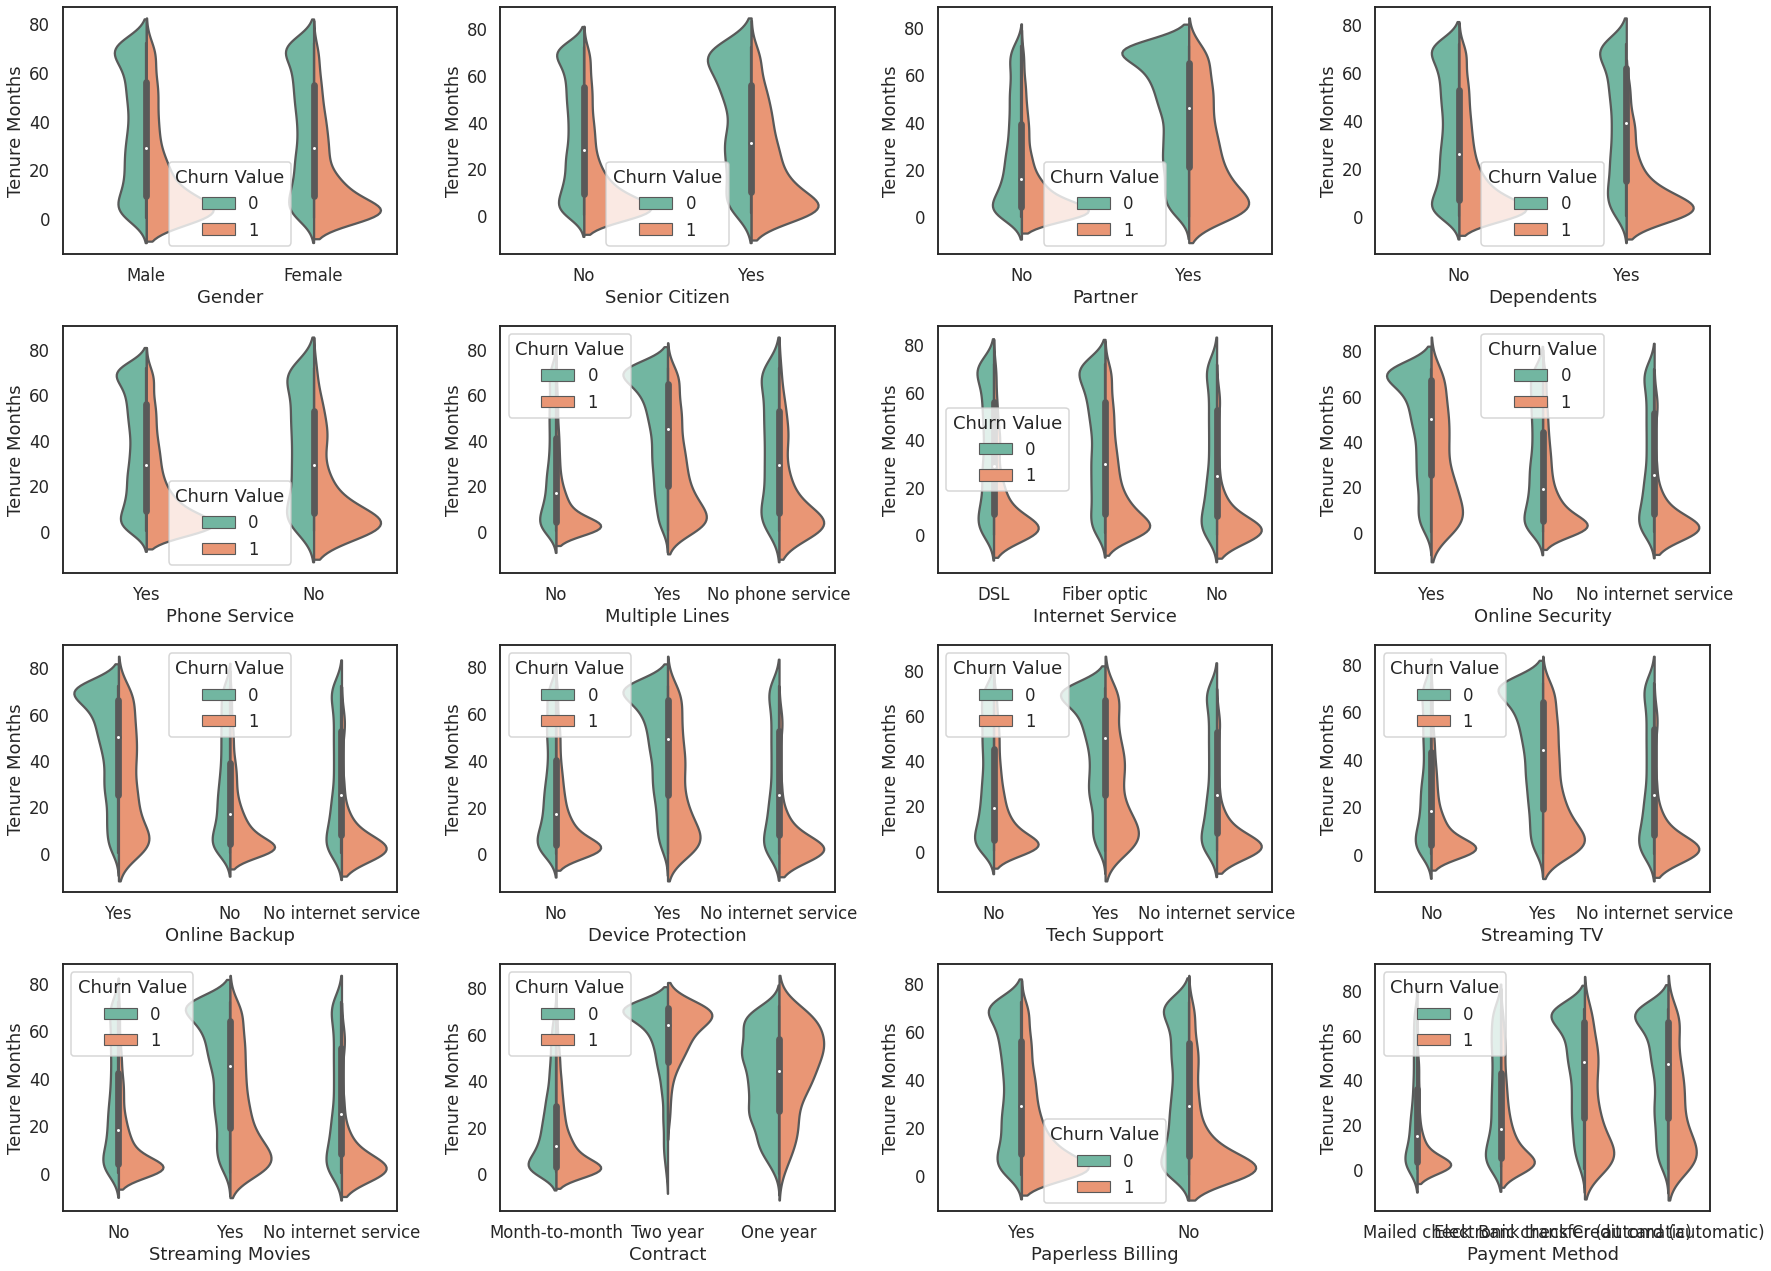

In [ ]:
## Violin plot for discrete 
y_values = 'Tenure Months'
variables = df.select_dtypes("object")
fig, ax = plt.subplots(4, 4, figsize = (25, 18))

for colms, axis in zip(variables.columns, ax.ravel()):
  
  if colms != "Churn Value" :
        sns.violinplot(data = df, x = colms, 
                    y = y_values,
                    palette = 'Set2',
                    split = True,
                    hue = "Churn Value",
                    ax = axis
                 )
    
plt.tight_layout();

###### Conclution

In [ ]:
## Instance of LabelEncoder and LabelBinarizer
la = LabelEncoder()
lb = LabelBinarizer()
## Convert categorical variables 
cat_var_colm = list((df.select_dtypes('object').nunique() >= 3).index)
for c in cat_var_colm:
  df[c] = la.fit_transform(df[c])

## Convert bianary variables
bina_var_colm = list((df.select_dtypes('object').nunique() == 2).index)
for colm in bina_var_colm:
  df[colm] = lb.fit_transform(df[colm])

df.head()

,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Churn Value,CLTV
0,33.964131,-118.272783,1,0,0,0,2,1,0,0,...,0,0,0,0,0,1,3,53.85,1,3239
1,34.059281,-118.307420,0,0,0,1,2,1,0,1,...,0,0,0,0,0,1,2,70.70,1,2701
2,34.048013,-118.293953,0,0,0,1,8,1,2,1,...,2,0,2,2,0,1,2,99.65,1,5372
3,34.062125,-118.315709,0,0,1,1,28,1,2,1,...,2,2,2,2,0,1,2,104.80,1,5003
4,34.039224,-118.266293,1,0,0,1,49,1,2,1,...,2,0,2,2,0,1,0,103.70,1,5340


### Correlation 

In [ ]:
## Crear una funcion para capturar los dos tipos de correlaction pearson y spearman 
def correlaction(df, coeffient_method = "pearson"):

  ## Coefficient of correlaction
  df_corr = df.drop(columns = 'Churn Value').corr(method= coeffient_method)

  ## labels
  labels =  np.where(np.abs(df_corr) > 0.75, "S",
                           np.where(np.abs(df_corr) > 0.5, "M",
                                    np.where(np.abs(df_corr) > 0.25, "W", "")))

  # Plots
  plt.figure(figsize=(15,8))
  sns.heatmap(df_corr, mask = np.eye(len(df_corr)), square = True,
              annot = labels, fmt = "", linewidths = .5,cmap ="vlag", 
              cbar_kws = {"shrink": 0.8}
              );

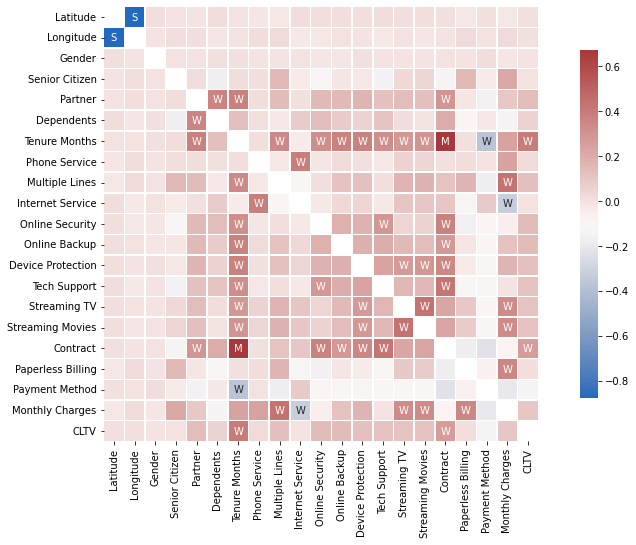

In [ ]:
# pearson
correlaction(df)

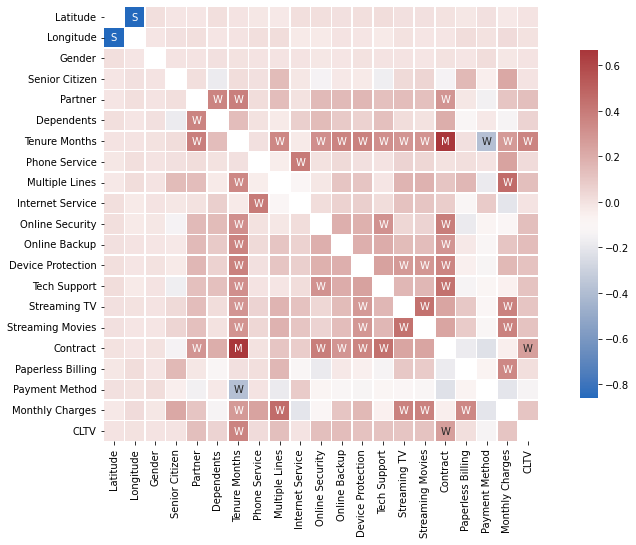

In [ ]:
## Spearman
correlaction(df, coeffient_method= 'spearman')

In [ ]:
## drop feature with higth correlaction
df.drop(columns = ['Latitude', 'Longitude'], inplace = True)

In [ ]:
## Save data
df.to_csv("Telco-churn-datset-M.csv", index = False)

In [ ]:
### Data preproseccing and feature enginerring 

In [ ]:
## Split Data into Features and labels
label = 'Churn Value'
X = df.drop(columns = label)
y = df[label]

print(f"Features shape: {X.shape}")
print(f"Labels shape: {y.shape}")

Features shape: (7043, 19)
Labels shape: (7043,)


In [ ]:
# Horizontal split with stratifiedshufflesplit to unbalance data
# proportion 80:10:10
strat_shuf_split = StratifiedShuffleSplit(n_splits = 1,
                                          test_size = 0.2,
                                          random_state= 42)

train_idx, test_idx = next(strat_shuf_split.split(X, y))

## Create the dataframe
X_train = X.iloc[train_idx]
y_train = y.iloc[train_idx]

X_test  = X.iloc[test_idx]
y_test  = y.iloc[test_idx]


In [ ]:
# Validation data
strat_shuf_split = StratifiedShuffleSplit(n_splits = 1,
                                          test_size = 0.25,
                                          random_state= 42)

train_idx, val_idx = next(strat_shuf_split.split(X_train, y_train))

## Create the dataframe
X_train = X.iloc[train_idx]
y_train = y.iloc[train_idx]

X_val  = X.iloc[val_idx]
y_val  = y.iloc[val_idx]

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_val shape:{X_val.shape}")
print(f"y_val shape: {y_val.shape}")
print(f"X_test shape:{X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (4225, 19)
y_train shape: (4225,)
X_val shape:(1409, 19)
y_val shape: (1409,)
X_test shape:(1409, 19)
y_test shape: (1409,)


In [ ]:
# OverSampling (SMOTE) method to unbalance data
from imblearn.over_sampling import SMOTE, ADASYN, KMeansSMOTE, BorderlineSMOTE,SVMSMOTE
from imblearn.combine import SMOTEENN, SMOTETomek

def oversampling(alg, X, y):
    
    alg_over = alg(random_state = 42, n_jobs = -1)#sampling_strategy='not majority'
  
    X_train_over, y_train_over = alg_over.fit_resample(X, y)
    
    return X_train_over, y_train_over

In [ ]:
X_train, y_train = oversampling(SMOTE, X, y) 

print(f"X train over shape: {X_train.shape}")
print(f"y train over shape: {y_train.shape}")

X train over shape: (10348, 19)
y train over shape: (10348,)


In [ ]:
## Feature Selection
def recursive_selection(X, y):

  # Model
  rfm = RandomForestClassifier(criterion = 'entropy', random_state = 42, n_jobs = -1)
  ## Recursive feature selection extimator
  rfe = RFECV(rfm, min_features_to_select =  17, cv = 5)
  # Fit 
  rfe = rfe.fit(X,y)

  ## Index of the best features
  features_idx = rfe.get_support(indices = True)

  return features_idx

In [ ]:
features_idx = recursive_selection(X_train, y_train)
X_train = X_train.iloc[: ,features_idx]
X_val = X_val.iloc[: ,features_idx]
X_test = X_test.iloc[: ,features_idx]

print(f"X_train shape: {X_train.shape}")
print(f"X_val shape:{X_val.shape}")
print(f"X_test shape:{X_test.shape}")

X_train shape: (10348, 17)
X_val shape:(1409, 17)
X_test shape:(1409, 17)


In [ ]:
X_train.head(10)

,Gender,Partner,Dependents,Tenure Months,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,CLTV
0,1,0,0,2,0,0,2,2,0,0,0,0,0,1,3,53.85,3239
1,0,0,1,2,0,1,0,0,0,0,0,0,0,1,2,70.70,2701
2,0,0,1,8,2,1,0,0,2,0,2,2,0,1,2,99.65,5372
3,0,1,1,28,2,1,0,0,2,2,2,2,0,1,2,104.80,5003
4,1,0,1,49,2,1,0,2,2,0,2,2,0,1,0,103.70,5340
5,0,1,0,10,0,0,0,0,2,2,0,0,0,0,1,55.20,5925
6,1,0,0,1,1,0,0,0,2,0,0,2,0,1,2,39.65,5433
7,1,0,0,1,0,2,1,1,1,1,1,1,0,0,3,20.15,4832
8,1,1,1,47,2,1,0,2,0,0,2,2,0,1,2,99.35,5789
9,1,1,0,1,1,0,0,2,0,0,0,0,0,0,2,30.20,2915


### **Modelling**

In [ ]:
from sklearn.metrics import log_loss, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

data_dict = {
    "Model": ["Baseline", "KNN", "XGBoost"],
    "Log-loss":[0,0,0],
    "Acuraccy":[0,0,0],
    "Precision":[0,0,0],
    "Recall": [0,0,0],
    "F1-score": [0,0,0],
    "AUC":[0,0,0]  
}

track_result = pd.DataFrame(data_dict, columns = ["Model","Log-loss",
                                                  "Acuraccy","Precision",
                                                 "Recall", "F1-score", "AUC"])
def model_results(model,y_val, y_pred):
    """ 
    """

    model_idx =  track_result[track_result["Model"] == model].index
    
    track_result.loc[model_idx, "Log-loss"] = log_loss(y_val, y_pred)
    track_result.loc[model_idx, "Acuraccy"] = accuracy_score(y_val, y_pred)
    track_result.loc[model_idx, "Precision"] = precision_score(y_val, y_pred)
    track_result.loc[model_idx, "Recall"] = recall_score(y_val, y_pred)
    track_result.loc[model_idx, "F1-score"] = f1_score(y_val, y_pred)
    track_result.loc[model_idx, "AUC"] = roc_auc_score(y_val, y_pred)
    
    return (track_result)

In [ ]:
## Baseline model (LogisticRegression)
lgr_model = LogisticRegression()
lgr_model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
## Baseline performance
bs_pred = lgr_model.predict(X_val)

model_results('Baseline', y_val, bs_pred)

,Model,Log-loss,Acuraccy,Precision,Recall,F1-score,AUC
0,Baseline,8.50613,0.753726,0.601399,0.742981,0.664734,0.750983
1,KNN,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
2,XGBoost,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000


### KNeighbors Model

In [ ]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
## Training performance
acc_knn_train = knn_model.score(X_train, y_train)
acc_knn_val = knn_model.score(X_val, y_val)

print(f"KNeighbors Train Accuracy:{np.round(acc_knn_train,2)} \nKNeighbors  Validation Accuracy: {np.round(acc_knn_val,2)}")

KNeighbors Train Accuracy:0.86 
KNeighbors  Validation Accuracy: 0.83


In [ ]:
## KNeighbors performance
knn_pred = knn_model.predict(X_val)

model_results('KNN', y_val, knn_pred)

,Model,Log-loss,Acuraccy,Precision,Recall,F1-score,AUC
0,Baseline,8.506130,0.753726,0.601399,0.742981,0.664734,0.750983
1,KNN,6.030305,0.825408,0.675283,0.902808,0.772643,0.845167
2,XGBoost,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


 #### Xgboost Model

In [ ]:
xgb_model = xgb.XGBClassifier(#subsample = 0.7,
                              #colsample_bytree = 0.4,
                              #max_depth = 4,
                              #scale_pos_weight= scale_pos_weight
                              )
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [ ]:
## Training performance
acc_xgb_train = xgb_model.score(X_train, y_train)
acc_xgb_val = xgb_model.score(X_val, y_val)

print(f"XGB Train Accuracy:{round(acc_xgb_train,2)} \nXGB Validation Accuracy: {round(acc_xgb_val,2)}")

XGB Train Accuracy:0.96 
XGB Validation Accuracy: 0.94


In [ ]:
## Baseline performance
xgb_pred = xgb_model.predict(X_val)

model_results('XGBoost', y_val, xgb_pred)

,Model,Log-loss,Acuraccy,Precision,Recall,F1-score,AUC
0,Baseline,8.506130,0.753726,0.601399,0.742981,0.664734,0.750983
1,KNN,6.030305,0.825408,0.675283,0.902808,0.772643,0.845167
2,XGBoost,2.083630,0.939674,0.897059,0.922246,0.909478,0.935225


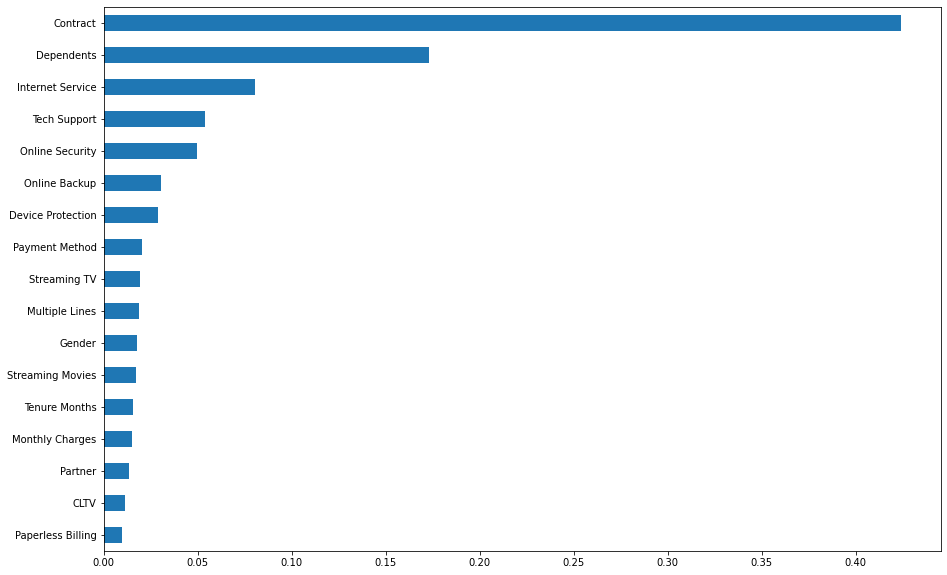

In [ ]:
## Feature importance 
importance_xgb = pd.Series(xgb_model.feature_importances_, index = X_train.columns)

#bar plot
importance_xgb.sort_values(ascending= True).plot(kind = 'barh', figsize = (15, 10));

##### **Observation**

### Hyperparameter Tuning

In [ ]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from hyperopt.pyll.base import scope
from sklearn.model_selection import cross_val_score

space = {
         'tree_method':'gpu_hist',
         'objective': 'binary:logistic',
         'subsample': hp.uniform('subsample', 0.4, 1.0),
         'colsample_bytree': hp.uniform('colsample_bytree', 0.4, 1.0),
         'learning_rate': hp.loguniform('learning_rate', np.log(0.0001), np.log(1.0)),
         'min_child_weight': hp.quniform('min_child_weight',3, 10, 1),
         'max_depth': scope.int(hp.uniform('max_depth', 1, 12)),
         'gamma': hp.quniform('gamma', 0, 20, 1),
         'reg_alpha': hp.uniform('reg_alpha', 0.01, 4.0),
         'reg_lambda': hp.quniform('reg_lambda', 4, 40, 1),
         'n_estimators': scope.int(hp.uniform('n_estimators', 100, 2000)),
         #'eval_metric': 'auc',
         'seed': 100, 
         
    }


def objective(param):

  model = xgb.XGBClassifier(**param)

  accuracy = cross_val_score(model, X_train, y_train, cv = 5).mean() 
 
  return {'loss': -accuracy, 'status': STATUS_OK }

    
trials = Trials()

best = fmin(fn= objective,
            space= space,
            algo= tpe.suggest,
            max_evals = 100,
            trials = trials
            )
best

100%|██████████| 100/100 [10:07<00:00,  6.07s/it, best loss: -0.8417222257245793]


{'colsample_bytree': 0.7767861352810786,
 'gamma': 0.0,
 'learning_rate': 0.0679877123774752,
 'max_depth': 11.7248583710846,
 'min_child_weight': 4.0,
 'n_estimators': 1027.0566435584287,
 'reg_alpha': 0.4205067157635871,
 'reg_lambda': 7.0,
 'subsample': 0.7930634621153184}

In [ ]:
### Train final model
final_model = xgb.XGBClassifier(
    tree_method = 'gpu_hist',
    objective = 'binary:logistic',
    learning_rate = best['learning_rate'],
    max_depth = int(best['max_depth']),
    subsample = best['subsample'],
    colsample_bytree = best['colsample_bytree'],
    min_child_weight = int(best['min_child_weight']),
    reg_lambda = best['reg_lambda'],
    reg_alpha = best['reg_alpha'],
    gamma = int(best['gamma']),
    n_estimators = int(best['n_estimators']),
    seed = 100


)

final_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1,
              colsample_bytree=0.7767861352810786, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=0, gpu_id=0,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.0679877123774752,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=11,
              max_leaves=0, min_child_weight=4, missing=nan,
              monotone_constraints='()', n_estimators=1027, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=100,
              reg_alpha=0.4205067157635871, reg_lambda=7.0, ...)

In [ ]:
## Evaluate the model with the test set
# Prediction
y_pred = final_model.predict(X_test)
y_pred_pro = final_model.predict_proba(X_test)

Accuracy: 0.9921930447125621 
Roc_Auc score: 0.9895631506884703
F1-score: 0.9852744310575635


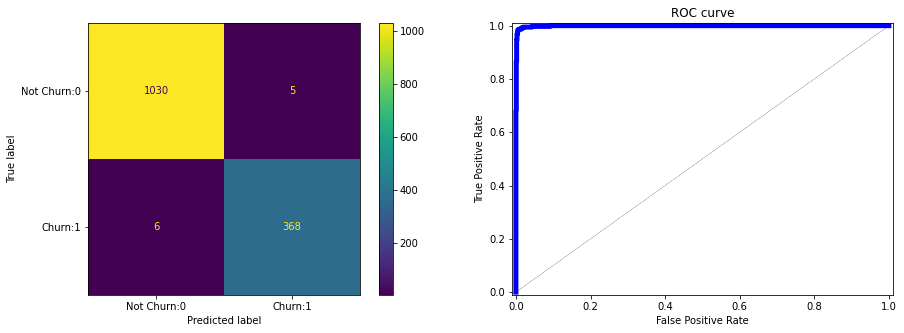

In [ ]:
from sklearn.metrics import roc_curve, ConfusionMatrixDisplay
## Accuracy and roc_auc score
print(f"Accuracy: {accuracy_score(y_test, y_pred)} \nRoc_Auc score: {roc_auc_score(y_test, y_pred)}\nF1-score: {f1_score(y_test, y_pred)}")

## Roc curve
fpr, tpr, thr = roc_curve(y_test, y_pred_pro[:,1])

## plot
plt.figure(figsize =(15,5))
layout = (1,2)

cmd = plt.subplot2grid(layout,(0,0))
rc = plt.subplot2grid(layout,(0,1))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax = cmd)
cmd.xaxis.set_ticklabels(["Not Churn:0", "Churn:1"])
cmd.yaxis.set_ticklabels(["Not Churn:0", "Churn:1"])

rc.plot(fpr, tpr, color ='blue', linewidth = 5)
rc.plot([0, 1],[0, 1], ls = '--', color = 'black', lw = .3)
rc.set(xlabel = 'False Positive Rate',
       ylabel = 'True Positive Rate',
       xlim =[-.01, 1.01], ylim =[-.01, 1.01],
       title = 'ROC curve')

plt.show()

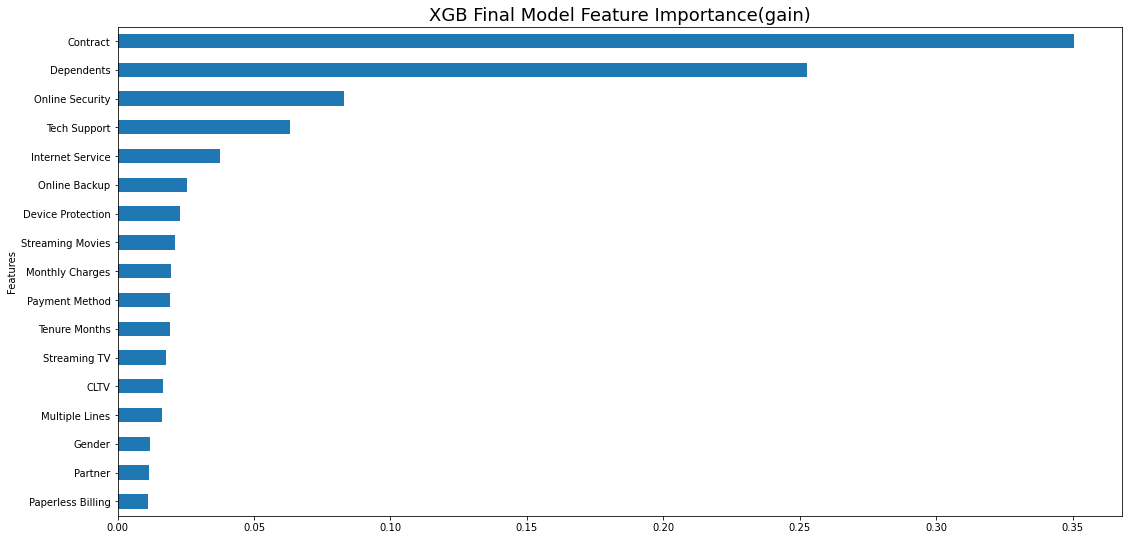

In [ ]:
## Feature importance
fea_imp_xgb = pd.Series(final_model.feature_importances_, index = X_train.columns)

# plot of the 5 best predictors 
fea_imp_xgb.sort_values(ascending = True).plot(kind = 'barh', figsize = (18, 9))
plt.xlabel('')
plt.ylabel('Features')
plt.title('XGB Final Model Feature Importance(gain)', fontsize = 18);

### **Serialization**

In [ ]:
with open("customer_churn_xgb_model.pkl", "wb") as f:
  joblib.dump(final_model, f)